# A Complete Introduction and Walkthough - Second Try

## 1. About Competition
이 대회의 목적은 **가구의 빈곤 정도**를 에측하는 것이다. `Target`은 1-4로 가난의 정도를 나타내며, 1이 극단적 빈곤을 의미한다. 개인에 대한 피처와 가구에 대한 피처가 섞여있으며, 주최측의 설명을 보아 개인이 아닌 가구에 대해 예측을 해야한다. 그러므로 개인 데이터를 집계하여 가구 데이터로 변환하는 과정이 필요하다.

평가 지표로는 각 클래스별 F1스코어의 평균을 낸 **Macro F1스코어**를 사용한다. 다만 클래스 분포로 보아 클래스 불균형 문제가 있는데 이 상황에서 Macro F1스코어는 적절치 않은 지표로 보인다. 하지만 대회측의 평가 지표이므로 Macro F1스코어로 모델 성능을 측정한다.

## 2. Imports

In [178]:
# 데이터 조작
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 그리기 위한 기본 세팅
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

# 데이터프레임 디스플레이시 최대 컬럼 수 지정
pd.options.display.max_columns = 150

## 2. Load Data

In [179]:
# 데이터 로드
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [180]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


학습 데이터는 143개의 피처와 9557개의 데이터를 갖고 있다. 그리고 143개의 피처는 다음과 같이 분류된다.
* **정수형(=카테고리형) 컬럼** : 130개
* **실수형(=연속적인 값) 컬럼** : 8개
* **문자열 컬럼 : 5개**

In [182]:
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


테스트 데이터는 `Target` 피처를 제외한 142개의 피처를 가지고 있으며 학습 데이터보다 훨씬 많은 23856개의 데이터를 갖고 있다. 

## 3. Explore Features

### 3.1. Integer Columns

Text(0.5, 1.0, 'count of unique values in integer columns')

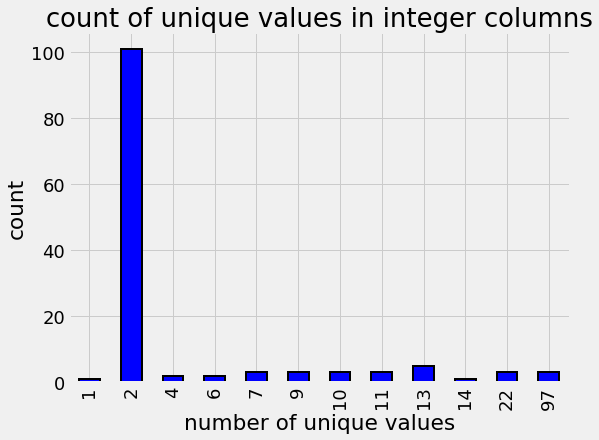

In [184]:
# 정수형 변수의 고유값 분포 - barplot
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(
    color='blue', figsize=(8, 6), edgecolor='k', linewidth=2)
plt.xlabel('number of unique values')
plt.ylabel('count')
plt.title('count of unique values in integer columns')

가장 많은 고유값이 2개인 컬럼은 **불리언 변수(Boolean)**를 나타낸다. 대부분의 경우 이 불리언 변수는 가구에 관한 변수이다.

### 3.2. Float Columns

In [185]:
from collections import OrderedDict

# 빈곤정도 색깔 매핑
colors = OrderedDict({1:'red', 2:'orange', 3:'blue', 4:'green'})
poverty_mapping = OrderedDict({1:'extreme', 2:'moderate', 3:'vulnerable', 4:'non vulnerable'})

In [ ]:
# seaborn의 버전차로 인해 노트북의 그래프 대로 나오지 않음
# 그래서 실행하지는 않고 아래 결과 사진을 첨부함
plt.figure(figsize=(20, 16))
plt.style.use('fivethirtyeight')


for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i+1)
    
    # 각 빈곤 정도별 실수형 변수의 분포 - kdeplot
    for poverty_level, color in colors.items():(
        sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna(),
                   ax=ax, color=color, label=poverty_mapping[poverty_level]))
    plt.title(f'{col.capitalize()} distribution')
    plt.xlabel(f'col')
    plt.ylabel('density')
    
# subplot의 위쪽 간격 조절
plt.subplots_adjust(top=2)

![real-result](../img/float-dist-plot.png)

실수형 컬럼은 연속적인 **변수(Continuous)**를 나타낸다. 위의 그래프로 보아 `meanedu`의 경우 타켓 값별 분포 차이를 보여주고 있으므로 타켓과 관련이 이쓴 것으로 보인다. 

자세한 내용은 뒤쪽에서 다시 설명할 예정!

### 3.3. Object Columns

In [188]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


* `Id`/`idhogar` : 개인/가구를 식별하기 위한 식별자
* `dependency` : 부양 정도 = (19세 이하, 64세 이상의 가구원 수)/(19세-64세의 가구원 수)
* `edjefe`/`edjefa`  : 남성/여성 가장의 교육 년수

이 중 `dependency`와 `edjefe`, `edjefa`는 문자열과 숫자가 섞여있는 것을 볼 수 있다. 이 변수들의 경우 yes는 0, no는 1로 변환해줘 모델에 넣을 수 있도록 만들어준다.

In [189]:
mapping = {'yes':1, 'no':0}

# 문자열 yes와 no를 1과 0으로 변환
for df in [train, test]:
    df['dependency']=df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


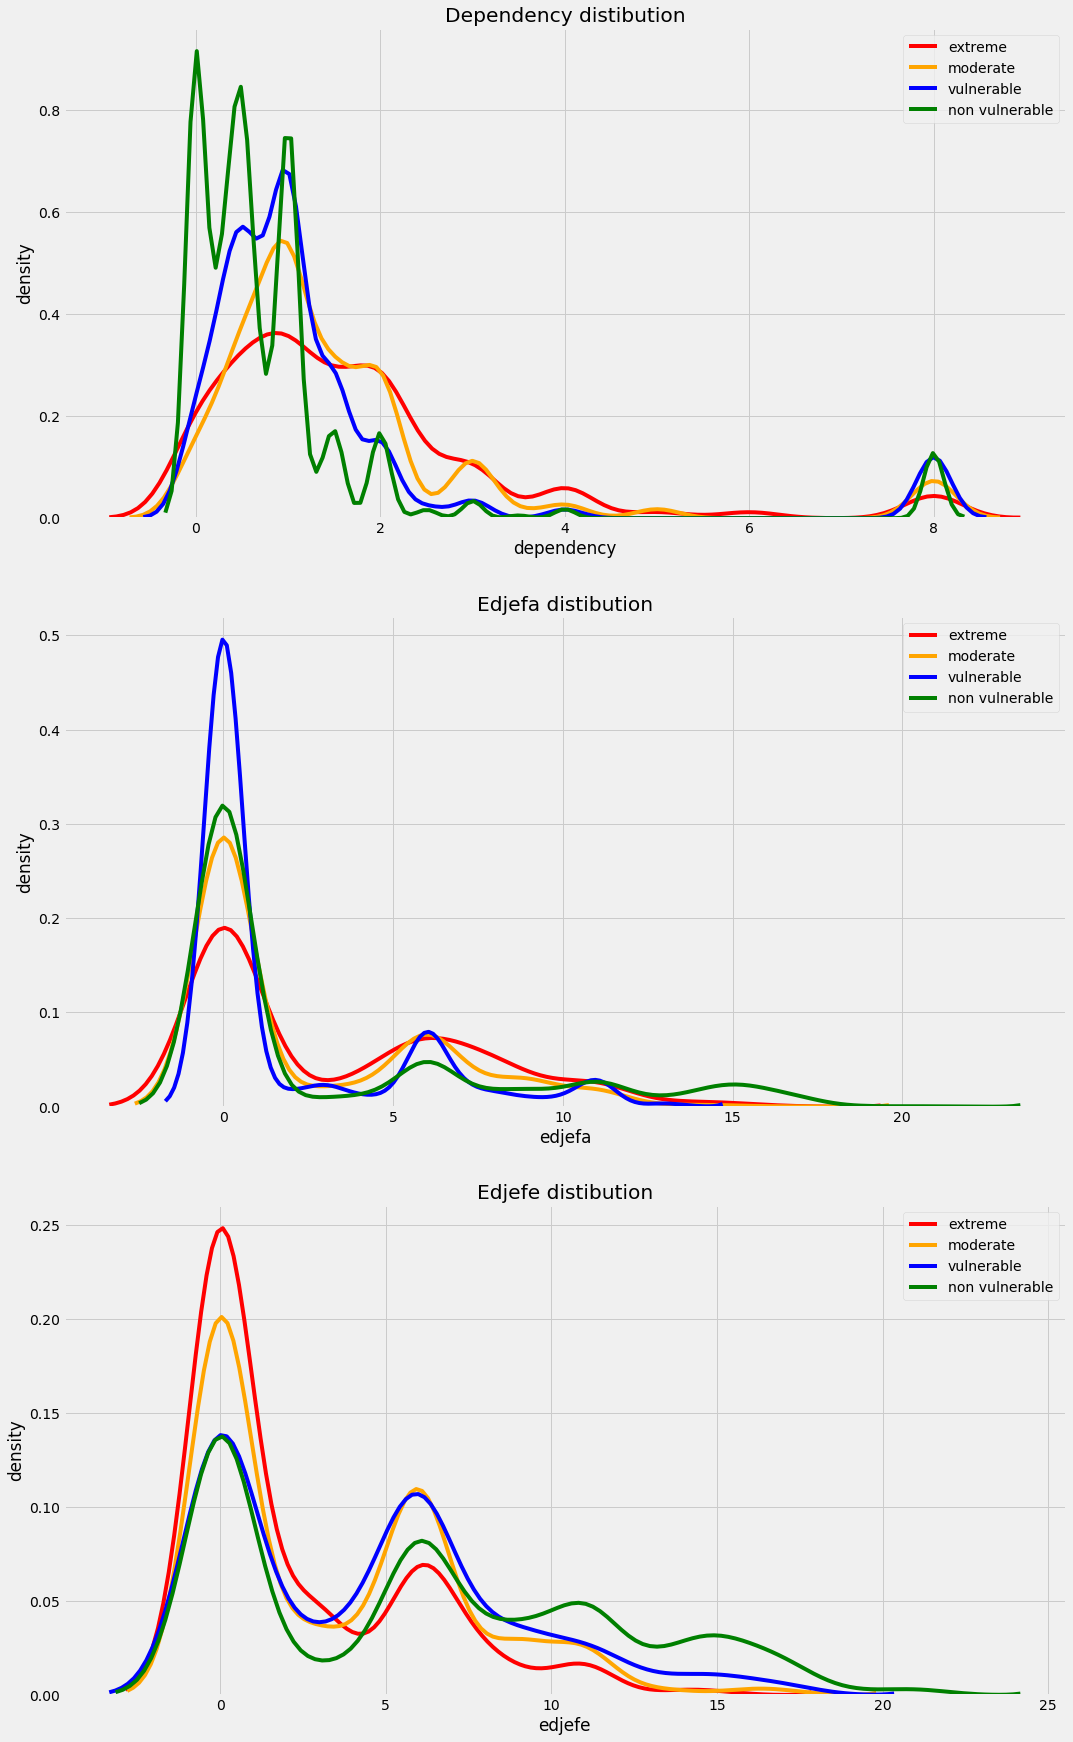

In [190]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i+1)
    
    # 빈곤정도별 값 분포 - kdeplot
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(
        ), ax=ax, color=color, label=poverty_mapping[poverty_level])

    plt.title(f'{col.capitalize()} distibution')
    plt.xlabel(f'{col}')
    plt.ylabel('density')

# subplot의 위쪽 간격 조절
plt.subplots_adjust(top=2)

## 4. Merge Train and Test Dataset
위의 전처리 과정을 조금 더 쉽게하기 위해 학습데이터와 테스트데이터를 병합할 수 있다. 왜냐하면 학습데이터에 한 작업을 동일하게 테스트데이터에도 적용을 해줘야 하기 때문이다.

다만 테스트데이터에는 `Target`이 없으므로 임의로 생성하여 `np.nan` 값으로 채워주자.

In [191]:
test['Target'] = np.nan
data = train.append(test, ignore_index=True)

data.tail()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
33408,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,3,0.0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,0.5,5.0,0.0,5.75,0,1,0,0,0,0,0,0,0,1,6.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,10,9,100,36,25,4,36.0,0.25,33.0625,100,NaN
33409,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,6,NaN,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d237404b6,2,2,0,4,1.0,6.0,0.0,6.00,0,0,1,0,0,0,0,0,0,2,2.0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,54,36,2916,16,36,4,4.0,1.00,36.0000,2916,NaN
33410,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,4,1.0,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,d237404b6,2,2,0,4,1.0,6.0,0.0,6.00,0,1,0,0,0,0,0,0,0,2,2.0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,12,16,144,16,36,4,4.0,1.00,36.0000,144,NaN
33411,ID_34d2ed046,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,5,0.0,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,d237404b6,2,2,0,4,1.0,6.0,0.0,6.00,0,1,0,0,0,0,0,0,0,2,2.0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,12,25,144,16,36,4,4.0,1.00,36.0000,144,NaN
33412,ID_34754556f,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,6,NaN,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,d237404b6,2,2,0,4,1.0,6.0,0.0,6.00,0,0,1,0,0,0,0,0,0,2,2.0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,51,36,2601,16,36,4,4.0,1.00,36.0000,2601,NaN


## 5. About Label
### 5.1. Explore Label Distribution
앞서 이야기했던 것처럼 이 데이터셋의 라벨의 분포는 불균형(imbalanced)하다. 정확한 라벨 분포를 보기 위해 `parentesco1==1`인 데이터만 추출하여 개인이 아닌 **가구의 라벨 분포**를 살펴보자.

In [192]:
# 가장 데이터 추출
heads = data.loc[data['parentesco1'] == 1].copy()
heads.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0,121.0,1444,4.0
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,9,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,1.0,9.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,30,81,900,16,81,4,16.000000,1.0,100.0,900,4.0


In [193]:
# 병합된 데이터에서 학습데이터 라벨 추출
train_labels = data.loc[(data['Target'].notnull()) & (
    data['parentesco1'] == 1), ['Target', 'idhogar']]
train_labels.head()

,Target,idhogar
0,4.0,21eb7fcc1
1,4.0,0e5d7a658
2,4.0,2c7317ea8
5,4.0,2b58d945f
8,4.0,d6dae86b7


In [194]:
# 타겟 값별 카운팅
label_counts = train_labels['Target'].value_counts().sort_index()
label_counts

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

Text(0.5, 1.0, 'poverty level breakdown')

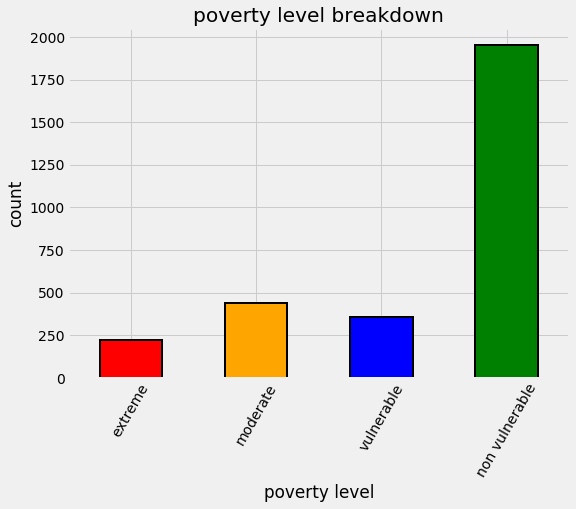

In [195]:
# 각 라벨  별 데이터 개수 - barplot
label_counts.plot.bar(figsize=(8, 6), color=colors.values(),
                     edgecolor='k', linewidth=2)
plt.xlabel('poverty level')
plt.ylabel('count')
plt.xticks([x-1 for x in poverty_mapping.keys()],
          list(poverty_mapping.values()), rotation=60)
plt.title('poverty level breakdown')

예상했다 싶이 **대부분의 라벨이 Non-Vulnerable에 쏠려 있는 것**을 볼 수 있다. 이런 경우 그 외의 라벨을 가진 데이터가 훨씬 적기 때문에 모델이 해당  라벨을 예측하는 데 어려움을 겪을 수 있다. 이 경우 개수가 적은 라벨들을 오버샘플링하여 균형을 맞추는 방법이 있다.

### 5.2. Address Wrong Labels
여느 데이터와 마찬가지로 이 데이터셋도 오류(error)를 가지고 있다. 이러한 오류가 발생하는 이유는 측정하는 사람의 입력 오류, 측정 오류 또는 맞지만 극단적인 수치인 경우 등 다양하다.

정확한 원인은 알 수 없으나 오류가 있기 때문에 **가장을 중심으로** 봐야하는 이유가 될 것이다.

#### 5.2.1. Identify Errors
에러를 고치기 전에 에러를 확인할 필요가 있다. 다음과 같은 과정을 통해 **한 가구의 모든 구성원이 같은 라벨을 갖고 있는지** 확인해보자.

In [196]:
# 가구로 그룹화한 뒤 고유값이 1개인지 확인
# 모든 구성원이 같은 라벨을 갖는지 확인
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
all_equal

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [197]:
# False(같은 라벨이 아닌 경우) 추출
not_equal = all_equal[all_equal != True]
print('같은 라벨값을 갖지 않는 가구의 수 :', len(not_equal))

같은 라벨값을 갖지 않는 가구의 수 : 85


In [198]:
# [예시]같 은 라벨 값을 갖지 않는 첫 번째 가구 추출
train[train['idhogar'] == not_equal.index[0]
      ][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


이처럼 가구의 모든 구성원이 같은 라벨을 갖지 않는 가구는 총 85가구임을 볼 수 있다. 위에는 그에 해당하는 첫 번째 가구의 데이터프레임인데 이럴 경우 **가장의 라벨을 가구의 라벨로** 취급한다. 위의 경우는 `parentesco1==1`인 데이터의 타겟 값인 **3**이 해당 가구의 라벨이 된다.

#### 5.2.2. Families without Heads of Household
**그럼 가장이 없는 가구의 경우는 어떻게 할까?** 우선 가장이 없는 가구가 몇 가구인지 살펴보자.

In [199]:
# 각 가구의 parentesco1 데이터 추출
households_leader = train.groupby('idhogar')['parentesco1'].sum()
households_leader

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [200]:
# 가장이 없는 가구 추출
households_no_head = train.loc[train['idhogar'].isin(
    households_leader[households_leader == 0].index), :]
print('가장이 없는 가구 수 :', households_no_head['idhogar'].nunique())

가장이 없는 가구 수 : 15


In [201]:
# 가장이 없는 가구의 라벨이 다른지 확인
households_no_head_equal = households_no_head.groupby(
    'idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('가장이 없는 가구 중 서로 다른 라벨을 가진 가구 수 :',
      sum(households_no_head_equal == False))

가장이 없는 가구 중 서로 다른 라벨을 가진 가구 수 : 0


다행히 가장이 없는 가구에서 서로 다른 라벨을 가진 가구는 없다. 대회 측에 따르면 **어떤 가구의 가장이 없는 경우 실제 라벨값이 무엇인지 알 수 없다**고 한다. 그러므로 우리는 가장이 없는 데이터의 경우 학습 시 사용하지 않을 것이다.

#### 5.2.3. Correct Errors
가장이 있는 가구의 라벨이 서로 다른 경우 가장의 라벨로 통일시켜주자.

In [202]:
for household in not_equal.index:
    # 가장의 라벨값  추출
    true_target = int(train[(train['idhogar'] == household) & (
        train['parentesco1'] == 1.0)]['Target'])
    # 해당 가정의 모든 구성원이 같은 라벨 값을 갖도록 통일
    train.loc[train['idhogar']==household, 'Target'] = true_target

In [203]:
# 가구를 기준으로 그룹화하여 라벨값이 모두 같은지 확인
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
all_equal

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [204]:
# 같은 타켓 값을 갖지 않는 가구수
not_equal = all_equal[all_equal != True]
print('구성원 모두가 같은 타켓 값을 갖지 않는 가구수 :', len(not_equal))

구성원 모두가 같은 타켓 값을 갖지 않는 가구수 : 0


## 6. Missing Values
결측치를 채우기 전 각 컬럼별 결측치의 비율을 살펴보자.

In [205]:
# 각 컬럼의 결측치 개수
missing = pd.DataFrame(data.isnull().sum()).rename(columns={0:'total'})
missing

,total
Id,0
v2a1,24263
hacdor,0
rooms,0
hacapo,0
...,...
SQBovercrowding,0
SQBdependency,0
SQBmeaned,36
agesq,0


In [206]:
# 결측치 비율 컬럼 생성
missing['percent'] = missing['total'] / len(data)
missing

,total,percent
Id,0,0.000000
v2a1,24263,0.726154
hacdor,0,0.000000
rooms,0,0.000000
hacapo,0,0.000000
...,...,...
SQBovercrowding,0,0.000000
SQBdependency,0,0.000000
SQBmeaned,36,0.001077
agesq,0,0.000000


In [207]:
# 비율을 기준으로 역정렬
missing.sort_values('percent', ascending=False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


이 중 결측치 비율의 상위권을 차지한 `v18q1`, `rez_esc`, `v2a1`에 대해 살펴보자.

### 6.1. Plot Value Counts
각 컬럼별 값의 개수를 그래프로 그리기 위한 간단한 함수를 정의하였다.

In [208]:
# 컬럼의 값 별 개수를 계산
# 분포를 barplot으로 나타냄
def plot_value_counts(df, col, heads_only=False):
    # heads_only라면 가장만 추출함
    if heads_only:
        df = df.loc[df['parentesco1']==1].copy()
    
    plt.figure(figsize=(8, 6))
    df[col].value_counts().sort_index().plot.bar(color='blue',
                                                edgecolor='k',
                                                linewidth=2)
    
    plt.xlabel(f'{col}')
    plt.title(f'{col} value counts')
    plt.ylabel('count')
    
    plt.show()

#### 6.1.1. v18q1
`v18q1`은 **가정이 소유하고 있는 태블릿 개수**를 나타낸다. 

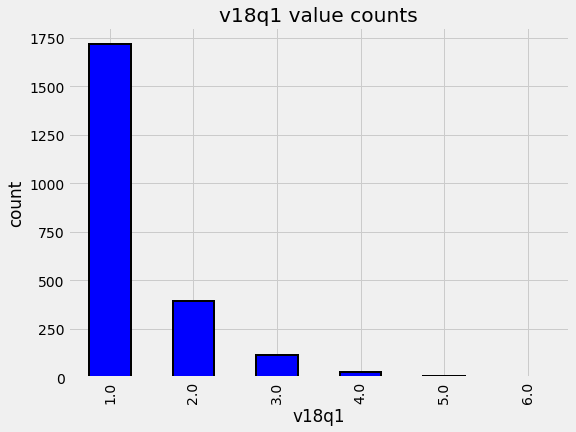

In [209]:
plot_value_counts(heads, 'v18q1')

대부분의 가구는 태블릿을 **1개**를 가지고 있는 것으로 보인다. 다만 결측치를 생각해본다면 이 값은 *태블릿을 갖고 있지 않는 경우*일 수도 있다. 

**한 가구가 테블릿을 소유하는지 여부**를 나타내는 `v18q`를 이용하여 결측치가 테블릿을 갖고 있지 않은 경우인지 확인해보자.

In [210]:
# v18q1이 NaN인 가구의 v18q가 0인지 확인
heads.groupby('v18q')['v18q1'].apply(lambda x:x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

`v18q`가 0일 때 `v18q1`의 결측치가 모두 몰려 있는 것으로 보아 **v18q1의 결측치는 태블릿을 가지고 있지 않는 경우**라 볼 수 있다. 그러므로 해당 결측치를 **0**으로 채워주자.

In [211]:
data['v18q1'] = data['v18q1'].fillna(0)

#### 6.1.2. v2a1
`v2a1`은 **월세 납부액(=임대료)**을 말한다. 다른 컬럼으로 `tipovivi_`가 있는 데 **주택의 소유/임대 현황**을 나타낸다. 이를 이용하여 `v2a1`의 결측치의 주택 소유/임대 현황을 살펴보자.

참고로 `tipovivi_`의 의미는 다음과 같다:
* `tipovivi1` : 완전한 개인 소유
* `tipovivi2` : 개인 소유지만 대출有
* `tipovivi3` : 임대로 소유
* `tipovivi4` : 담보로 잡혀 있음
* `tipovivi5` : 기타 (대여, 할당)

In [212]:
# 주택 소유/임대 여부를 나타내는 피처
own_variables = [x for x in data if x.startswith('tipo')]
own_variables

['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']

In [213]:
# v2a1의 결측치의 주택 소유/임대의 분포
v2a1_missing_dist = data.loc[data['v2a1'].isnull(), own_variables].sum()
v2a1_missing_dist

tipovivi1    20844
tipovivi2        0
tipovivi3        0
tipovivi4      597
tipovivi5     2822
dtype: int64

Text(0.5, 1.0, 'home ownership status for households missing rent payment')

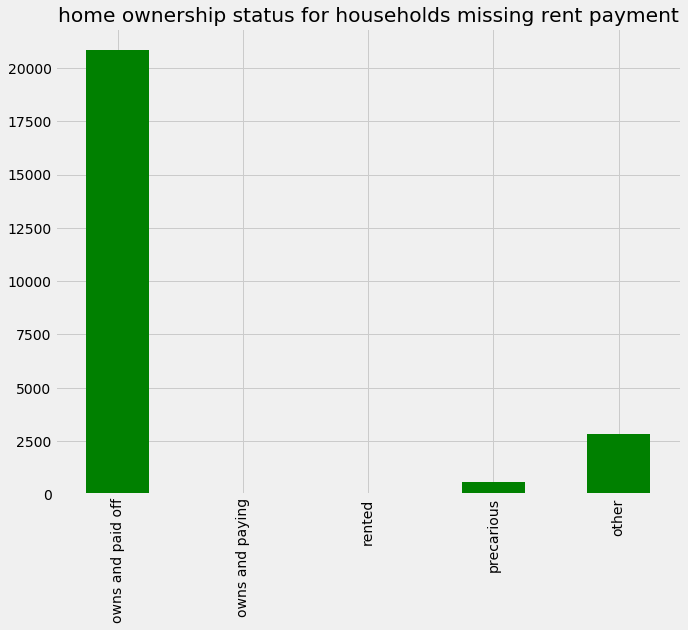

In [214]:
# 분포를 시각화 - barplot
v2a1_missing_dist.plot.bar(figsize=(10, 8), color='green',
                            ecolor='k', linewidth=2)
plt.xticks([0, 1, 2, 3, 4],
           ['owns and paid off', 'owns and paying', 'rented', 'precarious', 'other'])
plt.title('home ownership status for households missing rent payment')

`v2a1`의 결측치의 대부분이 **월세를 내지 않는, 개인 소유의 집을 갖고 있는 가구인 것**을 볼 수 있다. 그 외의 경우는 이유를 알 수 없다. 

개인 집을 소유하는 경우 `v2a1`의 결측치는 이므로 결측치를 **0**으로 채워주자. 그 외의 가구의 경우 후에 Imputation을 통해 채워지지만 결측치를 가진 가정임을 표시하기 위해 flag 컬럼을 추가해주자.

In [215]:
# 집을 소유하고 있는 가정의 v2a1을 0으로 채움
data.loc[(data['tipovivi1']==1), 'v2a1'] = 0
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4.0


In [216]:
# v2a1 누락 여부를 나타내는 컬럼 생성
data['v2a1-missing'] = data['v2a1'].isnull()
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

#### 6.1.3. rez_esc
`rez_esc`는 **지금 다니는 학교에서 몇 년이 지났는지**를 나타낸다. null값을 가진 가정의 경우 현재 학교를 다니는 자녀가 없을 가능성이 있다.

In [217]:
data['rez_esc'].value_counts()

0.0     4474
1.0      728
2.0      336
3.0      174
4.0       80
5.0       39
99.0       1
Name: rez_esc, dtype: int64

이를 확인하기 위해 결측치를 가진 데이터의 나이와 갖지 않은 데이터의 나이를 비교해보자.

In [218]:
# 결측치가 아닌 데이터의 나이 분포
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

결측치를 가지지 않은 개인의 나이의 **최대값은 17**임을 볼 수 있다. 참고로 코스타 리카의 교육제도는 *초등학교 6년*,  *중고등학교 5, 6년*으로 이루어져 있다.

이제 `rez_esc`의 결측치를 가진 개인의 나이 분포를 살펴보자.

In [219]:
# 결측치를 가진 개인 나이 분포
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

이 대회의 토론장(discussion)을 살펴보았다면 `rez_esc`는 **오직 7살 이상 19살 이하의 개인**에게만 정의되어 있음을 알 수 있다. 그러므로 19살 초과, 7살 이하의 개인의 데이터의 경우 모두 **0**으로 결측치를 채워주면 된다.

그 외에 7살 이상, 19살 이하이고 `rez_esc`가 결측치인 데이터는 Imputation 단계에서 채워두게 하고 결측치를 나타내는 flag 컬럼을 추가하자.

In [220]:
# 19살 초과, 7살 미만이고 rez_esc가 결측치인 경우
# 모두 0으로 채움
data.loc[((data['age'] > 19) | (data['age'] < 7)) &
         (data['rez_esc'].isnull()), 'rez_esc'] = 0

In [221]:
# 결측치를 가진 7살과 19살 사이의 결측치를 가진 데이터인 경우
# 결측치를 표시하는 flag 컬럼 추가
data['rez_esc-missing'] = data['rez_esc'].isnull()

앞서 `describe()`를 통해 `rez_esc`에 99인 이상치 1개를 볼 수 있다. 또한 해당 분포를 보았을 때 최대값은 5임을 알 수 있다. 그러므로 5가 넘는 값들을 모두 5로 변경해준다.

In [222]:
data.loc[data['rez_esc']>5, 'rez_esc'] = 5
data['rez_esc'].value_counts()

0.0    30894
1.0      728
2.0      336
3.0      174
4.0       80
5.0       40
Name: rez_esc, dtype: int64

### 6.2. Plot Two Categorical Variables
두 개의 카테고리형 변수들을 시각화하는 방법은 scatterplot, boxplot 등 다양하지만 저자는 이 방법에 만족하지 않아 다음과 같은 함수를 정의하였다. 

이 함수는 기본적으로 두 카테고리형 변수의 scatterplot으로 각 카테고리의 점의 크기가 **x를 고정값으로 둘 때 각 y값의 비율**을 나타낸다.

In [223]:
# 두 개의 카테고리형 변수를 시각화 - scatterplot
def plot_categoricals(x, y, data, annotate=True):
    # 정규화 하기 전의 카운트 데이터
    # 1. y를 기준으로 그룹화
    # 2. 그 때의 x의 값에 따른 개수 카운팅
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=False))
    raw_counts = raw_counts.rename(columns={x: 'raw_count'})
    
    # 정규화한 후의 카운트 데이터
    # x와 y의 각 그룸별 개수 카운팅
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=True))
    
    # 컬럼 명을 바꾸고 인덱스 순서 리셋
    counts = counts.rename(columns={x:'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # 정규화전 데이터인 raw_count 추가
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize=(14, 10))
    
    # 퍼센트를 기준으로 각 그룹별 분포 - scatterplot
    plt.scatter(counts[x], counts[y], edgecolor='k', color='lightgreen',
               s=100*np.sqrt(counts['raw_count']), marker='o',
               alpha=0.6, linewidth=1.5)
    
    if annotate:
        # 그림(plot)에 주석달기
        for i, row in counts.iterrows():
            # 적절한 오프셋(offset) 텍스트 삽입
            plt.annotate(xy=(row[x] - (1/counts[x].nunique()),
                            row[y] - (0.15/counts[y].nunique())),
                        color='navy',
                        s=f"{round(row['percent'], 1)}%")
    
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # 최소 최대값을 제곱근으로 변환
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 범례를 5가지로 구분
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # 범례의 마커(marker)
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # 범례 및 포맷팅
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # 축 한계 조정
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    
    plt.grid(True)
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.title(f"{y} vs {x}")

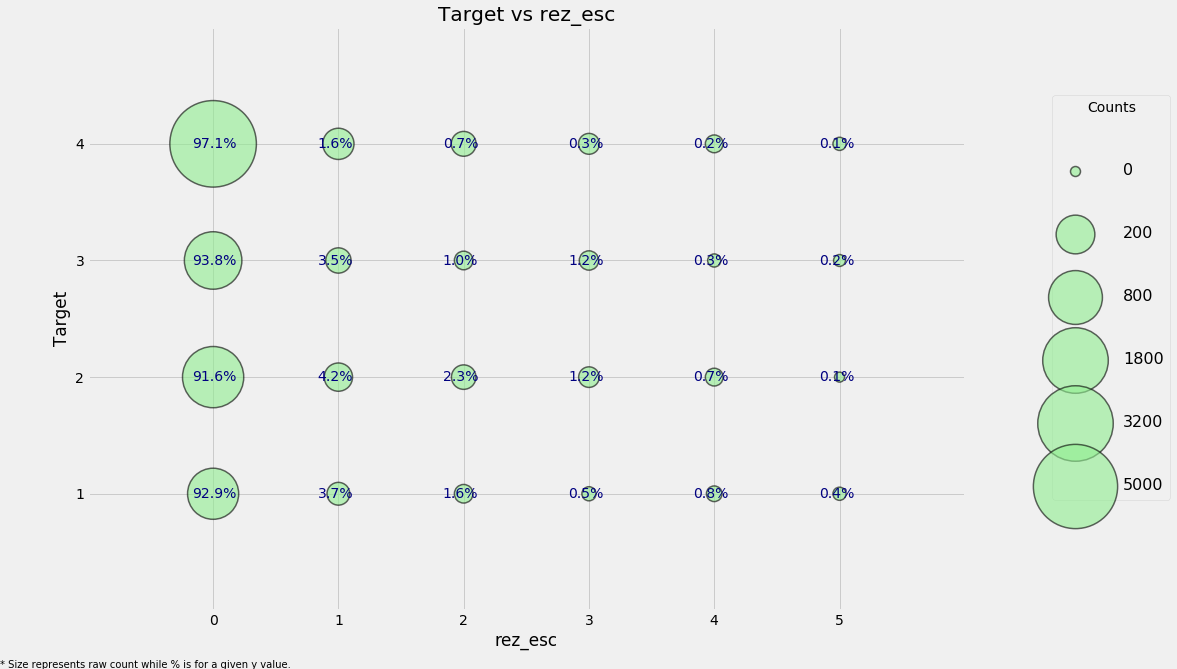

In [224]:
# rez_esc와 Target의 분포
plot_categoricals('rez_esc', 'Target', data)

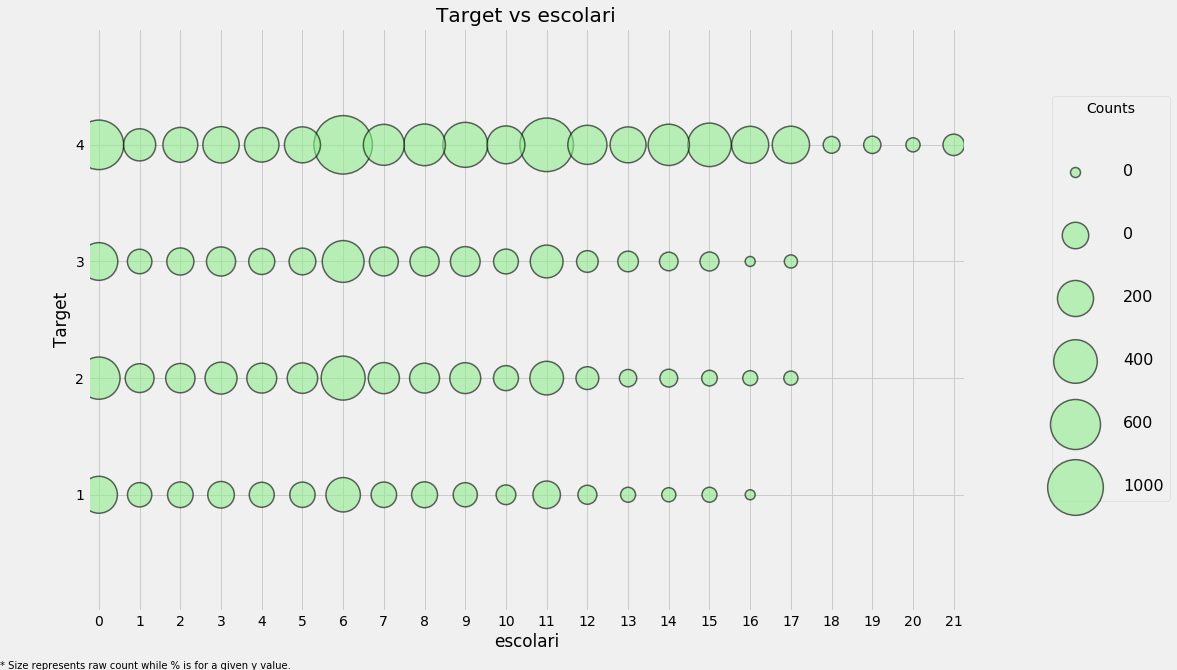

In [225]:
# escolari와 Target의 분포
plot_categoricals('escolari', 'Target', data, annotate=False)

### 6.3. Label Distribution of Missing Values
마지막으로 손실값들의 타켓 라벨의 분포를 살펴보자.

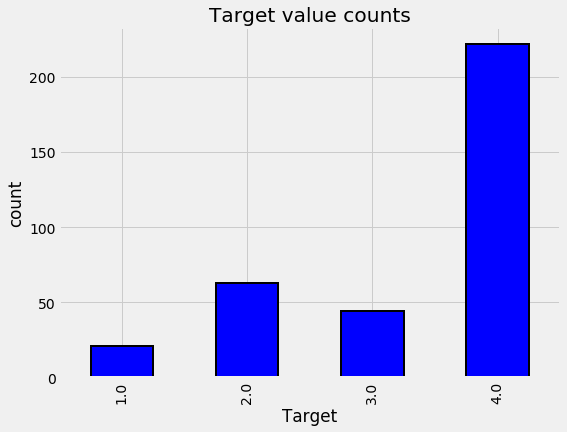

In [226]:
# rez_esc의 결측치
plot_value_counts(data[(data['rez_esc-missing']==1)], 'Target')

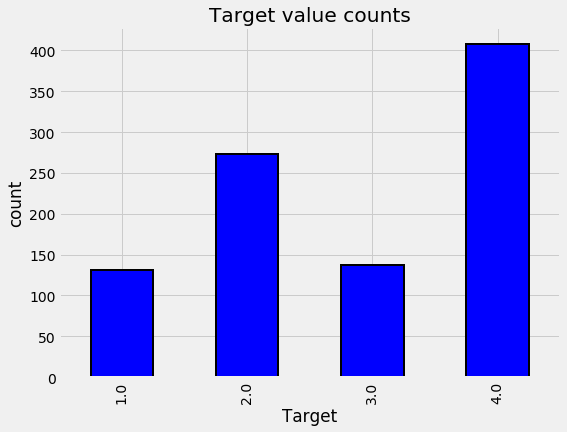

In [227]:
# v2a1의 결측치
plot_value_counts(data[data['v2a1-missing']==1], 'Target')

Non Vulnerable을 제외한 나머지의 분포를 보았을 때 결측치에서 `2`의 비율이 다소 높은 것을 볼 수 있다. 이를 감안했을 때 위의 지표들은 유용한 지표로 사용될 수 있을 것 같다.

가끔은 결측치가 중요한 정보를 가지고 있다는 것을 명심하자.

## 7. Feature Engineering
학습을 위해서 여러 개인을 한 가구로 통합시킬 필요가 있다. 이를 위해 개인을 가구  별로 그룹화하여 개별 값을 병합해보자.

### 7.1. Column Definitions
우선 각각의 컬럼의 정의와 해당 컬럼이 **개인 수준 혹은 가구 수준의 데이터인지**를 Documentation을 통해 알아보자. 그 후 가구 수준에서 각 변수의 특징을 반영하여 병합을 하면 된다.

1. 변수를 개인 수준과 가구 수준으로 구분한다.
2. 개인 수준의 데이터를 적절히 병합할 수 있는 방법을 찾는다.
3. 개인 수준의 데이터를 가구 수준의 데이터에 추가(병합)한다.

### 7.2. Define Variable Categories
첫 번째 단계인 변수를 정의하는 단계이다. 변수들은 다음과 같이 분류되었다.

* **개인 수준의 변수** : 불리언 변수, 서수형 변수
* **가구 수준의 변수** : 불리언 변수, 서수형 변수, 연속형 변수
* **제곱 변수** : 원 데이터를 제곱시킨 변수
* **Id 변수** : 데이터를 구분하기 위한 식별자로 피처로 사용되지 않음


In [228]:
# 개인 수준의 변수
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [229]:
# 가구 수준의 변수
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [230]:
# 제곱 변수
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [231]:
# ID 변수
id_ = ['Id', 'idhogar', 'Target']

혹시 그룹끼리 중복되는 변수가 없는지 확인해보자.

In [232]:
x = ind_bool + ind_ordered + hh_bool + hh_ordered + hh_cont + sqr_ + id_

In [233]:
from collections import Counter

print('중복되는 변수가 없다 :', np.all(np.array(list(Counter(x).values()))==1))
print('모든 변수를 커버한다 :', len(x) == data.shape[1])

중복되는 변수가 없다 : True
모든 변수를 커버한다 : True


### 7.3. Squared Variables
제곱된 피처는 선형 모델이 비선형관계를 학습하도록 도와주기 때문에 이러한 변수들을 사용하기도 한다. 하지만 그보다 더 복잡한 모델을 사용할 경우 비선형적인 특징이 중복될 수 있다.

또한 이 값은 제곱이 취해지기 전의 컬럼과 굉장히 높은 상관관계를 보이므로 이 변수의 경우 제거하는 편이 좋다.

Text(0.5, 1, 'squared age vs age')

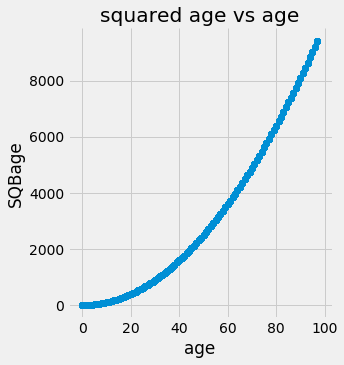

In [234]:
sns.lmplot('age', 'SQBage', data=data, fit_reg=False)
plt.title('squared age vs age')

In [235]:
data = data.drop(columns=sqr_)
data.shape

(33413, 136)

### 7.4. Id Variables
Id 값은 각 데이터를 식별하기 위해 반드시 필요하므로 제거하지 않는다.

### 7.5. Household Level  Variables

In [236]:
heads = data.loc[data['parentesco1']==1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
print('가구 수준 데이터의 크기 :', heads.shape)
heads.head()

가구 수준 데이터의 크기 : (10307, 99)


,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,v18q1,tamhog,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,bedrooms,qmobilephone
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,190000.0,0.0,10.0,0.0,10.0,1.000000,3,0,1,1,0,0,0,0,1,1,0.0,1,1,1,0,1,0,1,1,1
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,135000.0,8.0,12.0,0.0,12.0,1.000000,4,0,1,1,0,0,0,0,1,1,1.0,1,1,1,0,1,1,1,1,1
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,False,0.0,8.0,0.0,11.0,11.0,0.500000,8,0,0,0,0,1,1,0,1,1,0.0,1,1,1,0,1,1,1,2,0
5,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,180000.0,1.0,11.0,0.0,11.0,1.333333,5,0,2,2,1,1,2,1,3,4,1.0,4,4,4,2,2,0,4,3,3
8,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,False,130000.0,1.0,9.0,0.0,10.0,4.000000,2,0,1,1,2,1,3,2,2,4,0.0,4,4,4,2,2,0,4,1,1


#### 7.5.1. Redundant Household Variables
만약 높은 상관관계를 보이는 변수 쌍이 있다면, 둘 중 하나를 제거할 필요가 있다. 우선 상관계수가 0.95가 넘는 변수들을 알아보자.

In [237]:
# 상관관계 행렬 생성
corr_matrix = heads.corr()
corr_matrix

,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,v18q1,tamhog,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,bedrooms,qmobilephone
Target,1.000000,-0.136275,-0.096313,0.068230,0.119607,0.254469,-0.078851,-0.104545,-0.209131,-0.096893,-0.152979,-0.040128,-0.039861,0.005231,0.275452,0.016832,-0.054463,-0.114144,-0.103487,0.014357,0.032872,-0.026240,0.031516,0.295249,0.062961,-0.046518,-0.055818,0.021908,-0.009437,-0.051036,-0.007696,-0.049932,0.097592,-0.062316,-0.083835,-0.017669,-0.054739,0.158804,-0.083063,-0.162796,0.156930,-0.060286,-0.142433,-0.041221,NaN,0.023812,-0.208170,-0.162652,0.280947,-0.209181,-0.128644,0.261142,-0.217908,-0.174310,0.293540,-0.022316,0.131069,0.032834,-0.109057,-0.095326,0.173324,0.137407,0.175124,-0.019746,-0.085646,-0.084516,-0.079679,-0.047958,0.089509,-0.089509,-0.133152,0.161353,-0.126465,0.235687,0.052310,0.333652,-0.234954,0.201019,-0.186530,0.086395,-0.023307,-0.209479,-0.038193,-0.142157,-0.260917,0.036476,-0.111489,0.197493,-0.111557,-0.122554,-0.111557,-0.266309,0.127904,-0.025173,-0.111557,0.135203,0.168685
hacdor,-0.136275,1.000000,0.593867,-0.086701,-0.066409,-0.113787,0.026165,0.019816,0.110713,0.122610,0.068846,0.086632,-0.007015,-0.005960,-0.143259,-0.005960,0.026892,0.116650,0.026372,-0.036627,-0.007641,-0.008595,-0.006613,-0.148678,-0.036094,0.036627,0.005125,-0.004565,-0.003695,-0.002945,0.006355,0.064991,0.006987,-0.030309,0.053491,-0.007932,-0.012058,-0.035395,0.023407,0.033674,-0.060450,0.029765,0.051689,0.007229,-0.001652,-0.006817,0.146991,0.037738,-0.127219,0.112619,0.047893,-0.119760,0.151133,0.059861,-0.148503,-0.083256,-0.043135,0.046399,0.121261,0.072329,-0.054428,-0.041849,-0.054110,0.009782,0.027159,-0.008010,0.037814,0.030319,-0.009123,0.009123,0.116965,-0.019910,0.019191,-0.047917,-0.027628,-0.092837,0.620093,-0.197812,0.243406,0.050627,0.175272,0.219364,0.095605,0.191594,0.302703,0.099775,0.246122,-0.054685,0.246793,0.297433,0.246793,0.295757,0.043431,-0.058321,0.246793,-0.189177,0.026514
hacapo,-0.096313,0.593867,1.000000,-0.123276,-0.075336,-0.094350,0.022254,0.007634,0.089127,0.134901,0.042265,0.118369,-0.005219,-0.004434,-0.120922,-0.004434,-0.002458,0.115475,0.023931,-0.047382,-0.007023,-0.006394,-0.004920,-0.131246,-0.038001,0.035262,0.013710,-0.022503,-0.002749,0.002857,0.023222,0.105027,-0.013006,-0.027034,0.089556,-0.005901,0.002071,-0.028908,0.011194,0.042592,-0.056761,0.030683,0.045590,0.013695,-0.001229,-0.005071,0.133999,0.011774,-0.094734,0.112630,0.018830,-0.092966,0.153102,0.031874,-0.124185,-0.061334,-0.038374,0.030007,0.122973,0.050853,-0.039341,-0.035871,-0.055738,0.009390,0.029604,-0.005307,0.026064,0.041579,-0.012488,0.012488,0.097741,-0.019566,0.011497,-0.039651,-0.026451,-0.088360,0.467570,-0.200073,0.188811,0.056090,0.150316,0.170801,0.063220,0.140345,0.235222,0.082186,0.194963,-0.047469,0.195462,0.252206,0.195462,0.223288,0.046811,-0.043296,0.195462,-0.126525,0.036755
v14a,0.068230,-0.086701,-0.123276,1.000000,0.145417,0.065795,0.002527,0.007668,-0.020410,-0.128082,-0.068496,-0.034484,0.003483,0.002960,0.094633,0.002960,-0.057915,-0.140181,-0.076321,0.047145,0.012098,0.004268,0.003284,0.087430,0.169428,-0.110830,-0.178016,0.034658,0.001835,-0.096564,-0.000137,-0.460629,0.022767,0.082497,-0.135782,0.0

In [238]:
# 위쪽 삼각형 마스킹을 생성해 위쪽 삼각형만 추출
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1-missing,v2a1,dependency,edjefe,edjefa,meaneduc,overcrowding,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,v18q1,tamhog,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,bedrooms,qmobilephone
Target,NaN,-0.136275,-0.096313,0.068230,0.119607,0.254469,-0.078851,-0.104545,-0.209131,-0.096893,-0.152979,-0.040128,-0.039861,0.005231,0.275452,0.016832,-0.054463,-0.114144,-0.103487,0.014357,0.032872,-0.026240,0.031516,0.295249,0.062961,-0.046518,-0.055818,0.021908,-0.009437,-0.051036,-0.007696,-0.049932,0.097592,-0.062316,-0.083835,-0.017669,-0.054739,0.158804,-0.083063,-0.162796,0.156930,-0.060286,-0.142433,-0.041221,NaN,0.023812,-0.208170,-0.162652,0.280947,-0.209181,-0.128644,0.261142,-0.217908,-0.174310,0.293540,-0.022316,0.131069,0.032834,-0.109057,-0.095326,0.173324,0.137407,0.175124,-0.019746,-0.085646,-0.084516,-0.079679,-0.047958,0.089509,-0.089509,-0.133152,0.161353,-0.126465,0.235687,0.052310,0.333652,-0.234954,0.201019,-0.186530,0.086395,-0.023307,-0.209479,-0.038193,-0.142157,-0.260917,0.036476,-0.111489,0.197493,-0.111557,-0.122554,-0.111557,-0.266309,0.127904,-0.025173,-0.111557,0.135203,0.168685
hacdor,NaN,NaN,0.593867,-0.086701,-0.066409,-0.113787,0.026165,0.019816,0.110713,0.122610,0.068846,0.086632,-0.007015,-0.005960,-0.143259,-0.005960,0.026892,0.116650,0.026372,-0.036627,-0.007641,-0.008595,-0.006613,-0.148678,-0.036094,0.036627,0.005125,-0.004565,-0.003695,-0.002945,0.006355,0.064991,0.006987,-0.030309,0.053491,-0.007932,-0.012058,-0.035395,0.023407,0.033674,-0.060450,0.029765,0.051689,0.007229,-0.001652,-0.006817,0.146991,0.037738,-0.127219,0.112619,0.047893,-0.119760,0.151133,0.059861,-0.148503,-0.083256,-0.043135,0.046399,0.121261,0.072329,-0.054428,-0.041849,-0.054110,0.009782,0.027159,-0.008010,0.037814,0.030319,-0.009123,0.009123,0.116965,-0.019910,0.019191,-0.047917,-0.027628,-0.092837,0.620093,-0.197812,0.243406,0.050627,0.175272,0.219364,0.095605,0.191594,0.302703,0.099775,0.246122,-0.054685,0.246793,0.297433,0.246793,0.295757,0.043431,-0.058321,0.246793,-0.189177,0.026514
hacapo,NaN,NaN,NaN,-0.123276,-0.075336,-0.094350,0.022254,0.007634,0.089127,0.134901,0.042265,0.118369,-0.005219,-0.004434,-0.120922,-0.004434,-0.002458,0.115475,0.023931,-0.047382,-0.007023,-0.006394,-0.004920,-0.131246,-0.038001,0.035262,0.013710,-0.022503,-0.002749,0.002857,0.023222,0.105027,-0.013006,-0.027034,0.089556,-0.005901,0.002071,-0.028908,0.011194,0.042592,-0.056761,0.030683,0.045590,0.013695,-0.001229,-0.005071,0.133999,0.011774,-0.094734,0.112630,0.018830,-0.092966,0.153102,0.031874,-0.124185,-0.061334,-0.038374,0.030007,0.122973,0.050853,-0.039341,-0.035871,-0.055738,0.009390,0.029604,-0.005307,0.026064,0.041579,-0.012488,0.012488,0.097741,-0.019566,0.011497,-0.039651,-0.026451,-0.088360,0.467570,-0.200073,0.188811,0.056090,0.150316,0.170801,0.063220,0.140345,0.235222,0.082186,0.194963,-0.047469,0.195462,0.252206,0.195462,0.223288,0.046811,-0.043296,0.195462,-0.126525,0.036755
v14a,NaN,NaN,NaN,NaN,0.145417,0.065795,0.002527,0.007668,-0.020410,-0.128082,-0.068496,-0.034484,0.003483,0.002960,0.094633,0.002960,-0.057915,-0.140181,-0.076321,0.047145,0.012098,0.004268,0.003284,0.087430,0.169428,-0.110830,-0.178016,0.034658,0.001835,-0.096564,-0.000137,-0.460629,0.022767,0.082497,-0.135782,0.003939,-0.125215,0.037976,0.000772,-0.050813,0.068897,-

In [239]:
# 상관계수가 0.95보다 큰 피처들의 인덱스 추출
to_drop = [col for col in upper.columns if any(abs(upper[col]) > 0.95)]
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

##### 7.5.1.1. tamhog feature

In [240]:
data['tamhog'].value_counts()

4     8736
3     7664
5     5607
2     4682
6     2917
7     1307
1     1300
8      576
9      288
10     160
11      88
13      52
12      36
Name: tamhog, dtype: int64

In [241]:
# tamhog와 상관관계가 높은 피처 추출
tamhog_corr = corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9]
tamhog_corr

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


`tamhog`는 **가구의 크기**를 뜻한다. `tamhog`와 상관관계가 높은 나머지 변수들은 **집의 크기**와 관련있는 변수들이다. 각 변수에 대한 설명을 보면 비슷한 변수임을 알 수 있다.
* `r4t3` : 가구의 총 사람 수
* `tamviv` : 가구에 실제 살고 있는 사람의 수
* `hhsize` : 가구의 크기
* `hogar_total` : 가구의 총 인원 수

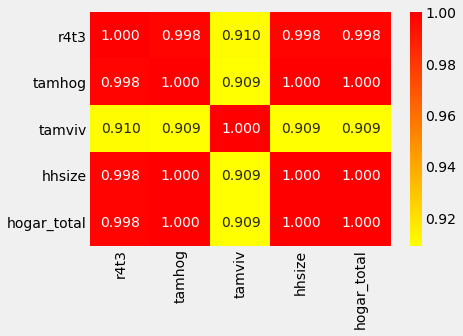

In [242]:
# 위의 행렬을 heatmap으로 시각화
sns.heatmap(tamhog_corr, annot=True, cmap=plt.cm.autumn_r, fmt='.3f')

위의 5개의 변수는 높은 상관관계를 보이며 `hhsize`는 `tamhog`, `hogar_total`과 완벽한 선형성을 보여준다. `r4t3` 또한 거의 1에 가까운 선형성을 보여주기 때문에 `tamhog`, `hogar_total`, `r4t3` 변수를 제거해줄 것이다.

`tamviv`는 **실제로 가구에 살고 있는 사람의 수**, `hhsize`는 **가구의 크기**이므로 이 둘은 다를 수 있다. 왜냐하면 해당 가구에 살고 있지 않는 가족이 있을 수 있기 때문이다. 이를 scatterplot을 그려 살펴보자.

In [243]:
heads = heads.drop(columns=['tamhog', 'hogar_total', 'r4t3'])
heads.shape

(10307, 96)

C:\Users\sunje\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'household size vs number of persons living in the household')

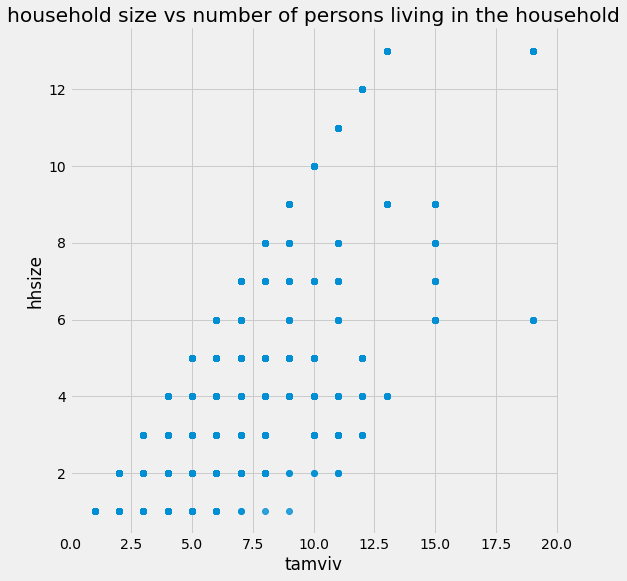

In [244]:
# tamviv와 hhsize의 분포 - scatterplot
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size=8)
plt.title('household size vs number of persons living in the household')

이처럼 등록된 가구원의 수와 실제 집에 살고 있는 수가 다를 수 있다는 것을 볼 수 있다. 이 차이를 보여주는 변수 `hhsize-diff`를 생성해주자.

In [245]:
# 등록된 가구원의 수와 실 가구원의 수 차이를 나타내는 hhsize-diff 피처 생성
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
heads['hhsize-diff']

0        0
1        0
2        0
5        0
8        0
        ..
33393    0
33398    0
33400    0
33404    0
33409    0
Name: hhsize-diff, Length: 10307, dtype: int64

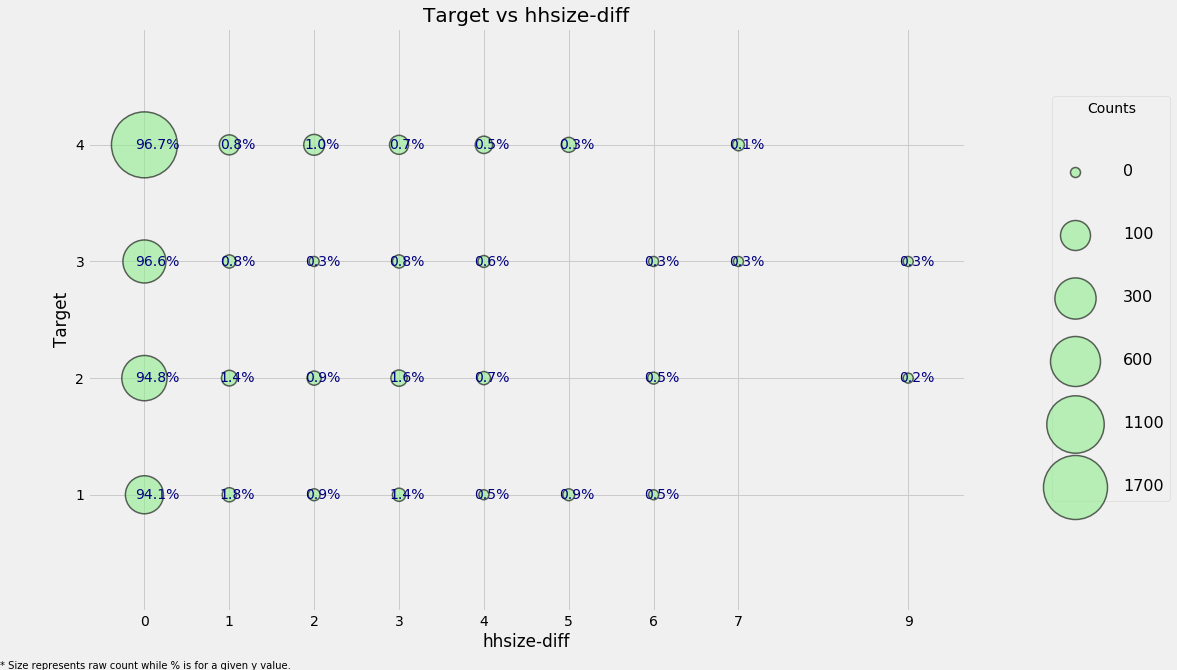

In [246]:
plot_categoricals('hhsize-diff', 'Target', heads)

##### 7.5.1.2. coopele feature

In [247]:
heads['coopele'].value_counts()

0    9151
1    1156
Name: coopele, dtype: int64

In [248]:
# coopele와 상관관계가 높은 피처 추출
coopele_corr = corr_matrix.loc[corr_matrix['coopele'].abs()>0.9, corr_matrix['coopele'].abs()>0.9]
coopele_corr

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


`coopele`는 **협동 조합에서 전기가 왔는지**를 나타내는 변수이다. `public`은 CNFL, ICE, ESPH/JASEX 등의 **전기 회사에서 왔는지**를 나타낸다. 위의 변수들을 포함하여 **어디서 전기가 왔는지**를 나타내는 불리언 변수 4가지가 존재한다.

* `noelec` : 전기가 없음
* `coopele` : 전기 from 협동조합
* `public` : 전기 from 전기회사 (ex. CNFL, ICE, ESPH/JASEX)
* `planpri` : 전기 from 개인 발전

이 변수들을 한 번에 묶어 **어디서 전기가 왔는지**를 나타내는 새로운 변수를 생성해주자.

In [249]:
elec = []

for i, row in heads.iterrows():
    # 전기가 없음
    if row['noelec'] == 1:
        elec.append(0)
    # 협동조합으로부터 전기 얻음
    elif row['coopele'] == 1:
        elec.append(1)
    # 전기회사로부터 전기 얻음
    elif row['public'] == 1:
        elec.append(2)
    # 자가발전으로 전기 얻음
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)

In [250]:
# 어디서 전기가 왔는지를 나타내는 새로운 변수 elec 생성
heads['elec'] = elec
# 어디서 온지 모른 경우 → flag 피처를 생성
heads['elec-missing'] = heads['elec'].isnull()
# 기존의 피처들 제거
heads = heads.drop(columns=['noelec', 'coopele', 'public', 'planpri'])

heads[['elec', 'elec-missing']].head()

,elec,elec-missing
0,2.0,False
1,2.0,False
2,2.0,False
5,2.0,False
8,2.0,False


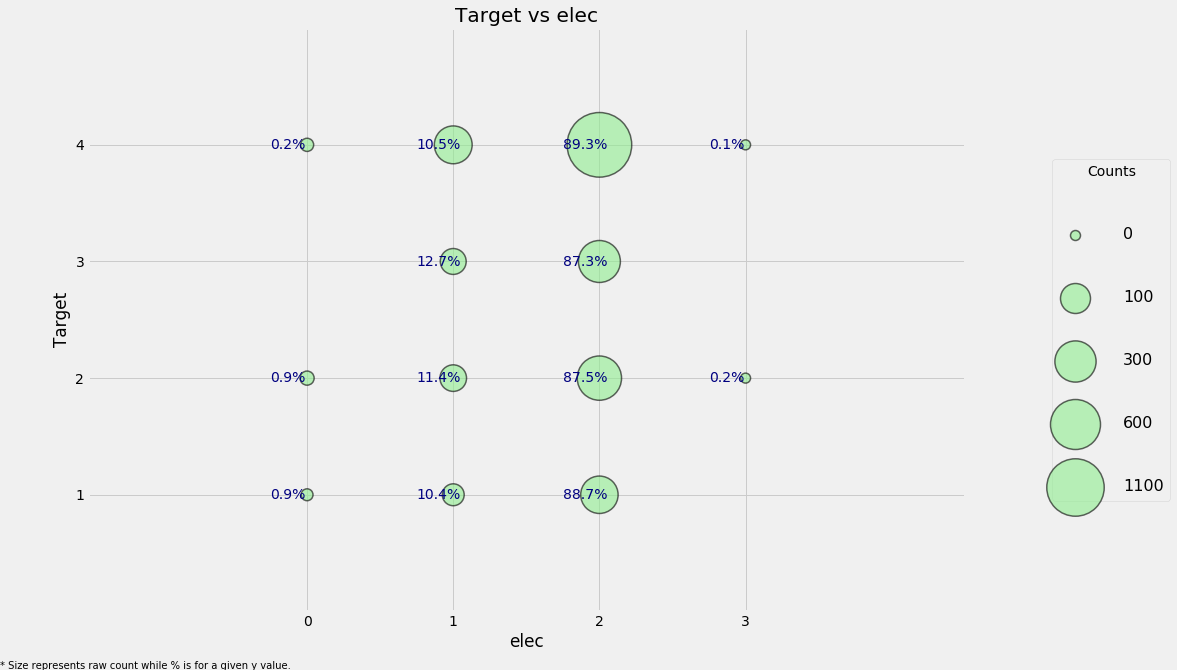

In [251]:
plot_categoricals('elec', 'Target', heads)

전기를 공급받는 가장 흔한 방법은 **전기회사**로부터 받는 것이다.

##### 7.5.1.3. area2 feature
`area2`는 **집이 교외에 있는지**를 나타내는 변수이다. `area1`은 **집이 도심에 있는지**를 나타내는데 `area2`와 `area1`은 여자/남자와 같은 관계로 두 변수가 중복되었음을 알 수 있다.

그러므로 `area2`를 제거해서 `area1`만 남겨두자.

In [252]:
# area2와 높은 상관관계를 가지는 변수들
corr_matrix.loc[corr_matrix['area2'].abs() > 0.9, corr_matrix['area2'].abs() > 0.9]

,area1,area2
area1,1.0,-1.0
area2,-1.0,1.0


In [253]:
# area2 제거
heads = heads.drop(columns='area2')

In [254]:
# area1의 값별 타켓 값 분포
heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

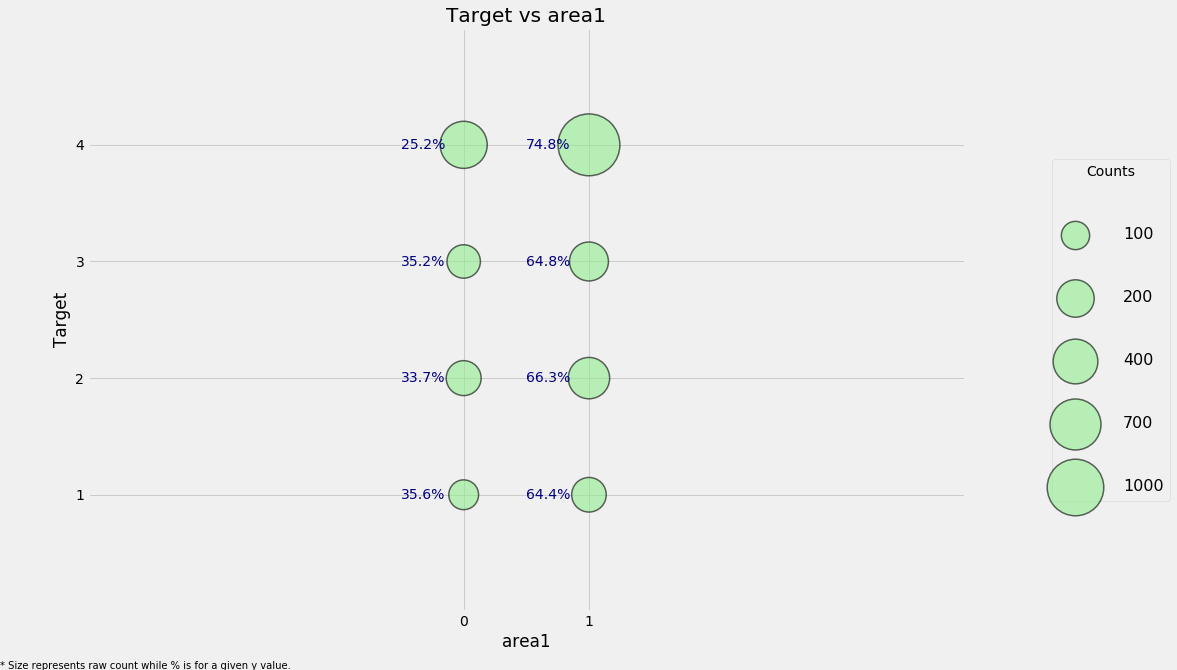

In [255]:
plot_categoricals('area1', 'Target', heads)

#### 7.5.2. Creating Ordinal Variables
가구와 관련된 변수 중 각 **벽, 지붕, 바닥**과 관련되어 좋고 나쁨을 표현하는 3개의 변수가 존재한다. 각각 벽, 지붕, 바닥과 관련하여 **상태가 어떠한지를 나타내는** 서수형 변수로 변환해주자. 

##### 7.5.2.1. wall feature

In [256]:
# 벽(wall)과 관련된 변수
heads[['epared1', 'epared2', 'epared3']]

,epared1,epared2,epared3
0,0,1,0
1,0,1,0
2,0,1,0
5,0,0,1
8,1,0,0
...,...,...,...
33393,0,1,0
33398,1,0,0
33400,0,1,0
33404,1,0,0


In [257]:
np.array(heads[['epared1', 'epared2', 'epared3']])

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [258]:
# 벽의 상태와 관련된 서수형 변수 wall 생성
heads['wall'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis=1)
# 기존 변수들 제거
heads = heads.drop(columns=['epared1', 'epared2', 'epared3'])

heads['wall'].value_counts()

2    6011
1    3203
0    1093
Name: wall, dtype: int64

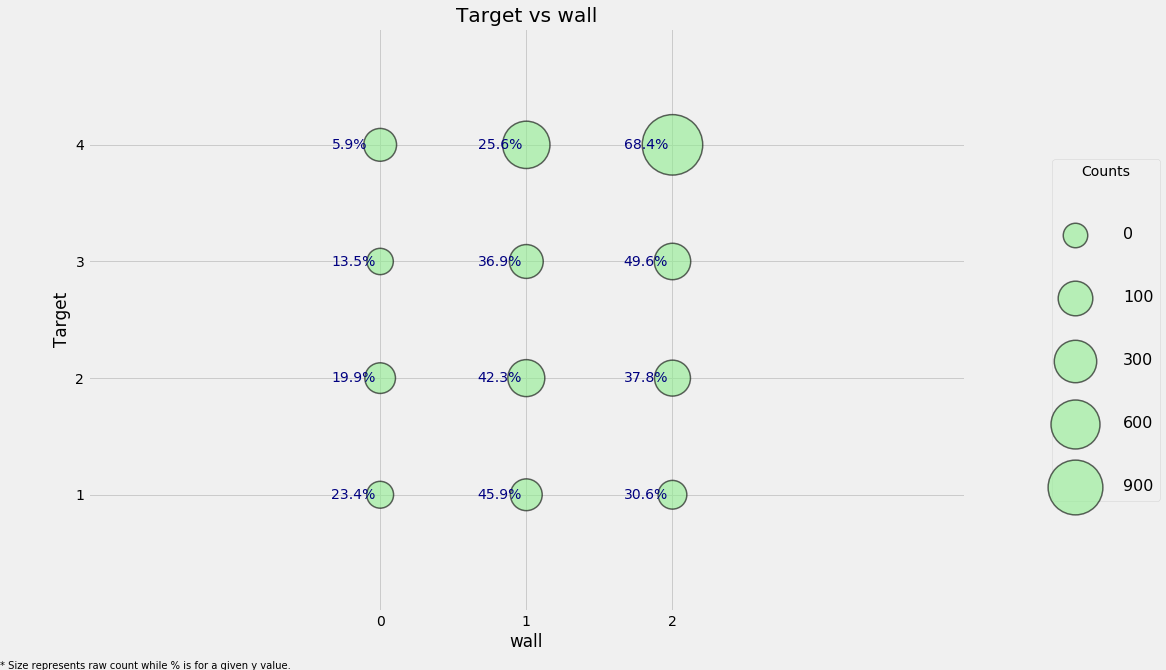

In [259]:
plot_categoricals('wall', 'Target', heads)

##### 7.5.2.2. roof feature

In [260]:
# 지붕의 상태와 관련된 서수형 변수 roof 생성
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]), axis=1)
# 기존 변수들 제거
heads = heads.drop(columns=['etecho1', 'etecho2', 'etecho3'])

heads['roof'].value_counts()

2    6005
1    3011
0    1291
Name: roof, dtype: int64

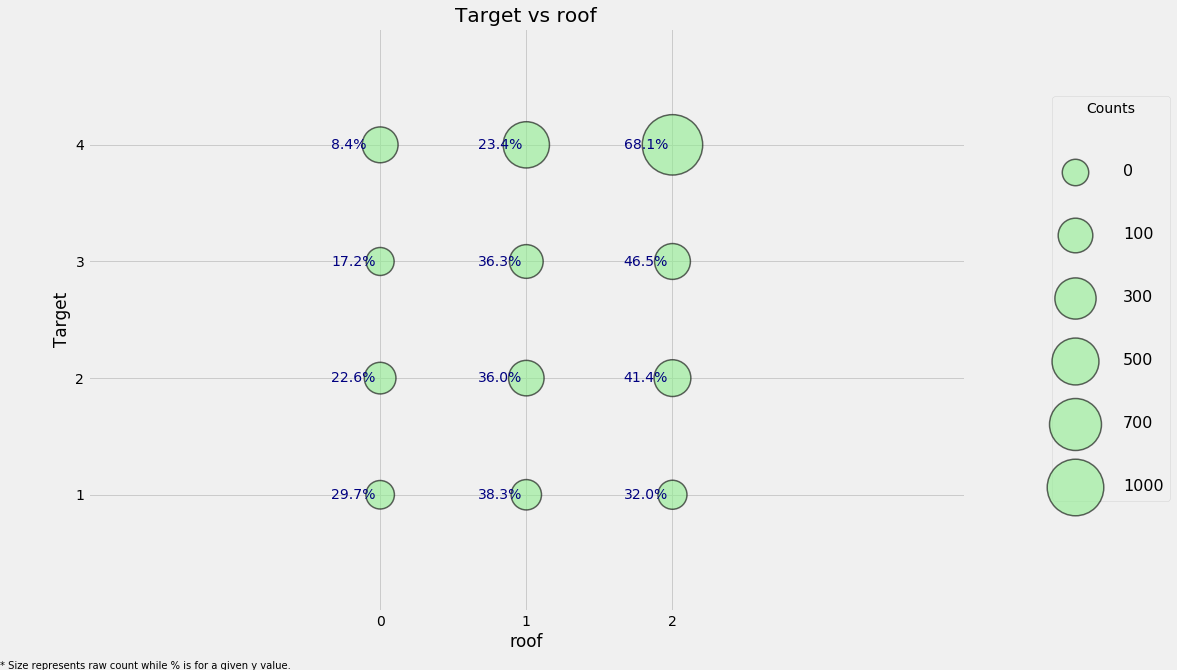

In [261]:
plot_categoricals('roof', 'Target', heads)

##### 7.5.2.3. floor feature

In [262]:
# 바닥의 상태와 관련된 서수형 변수 floor 생성
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis=1)
# 기존 변수들 제거
heads = heads.drop(columns=['eviv1', 'eviv2', 'eviv3'])

heads['floor'].value_counts()

2    6665
1    2635
0    1007
Name: floor, dtype: int64

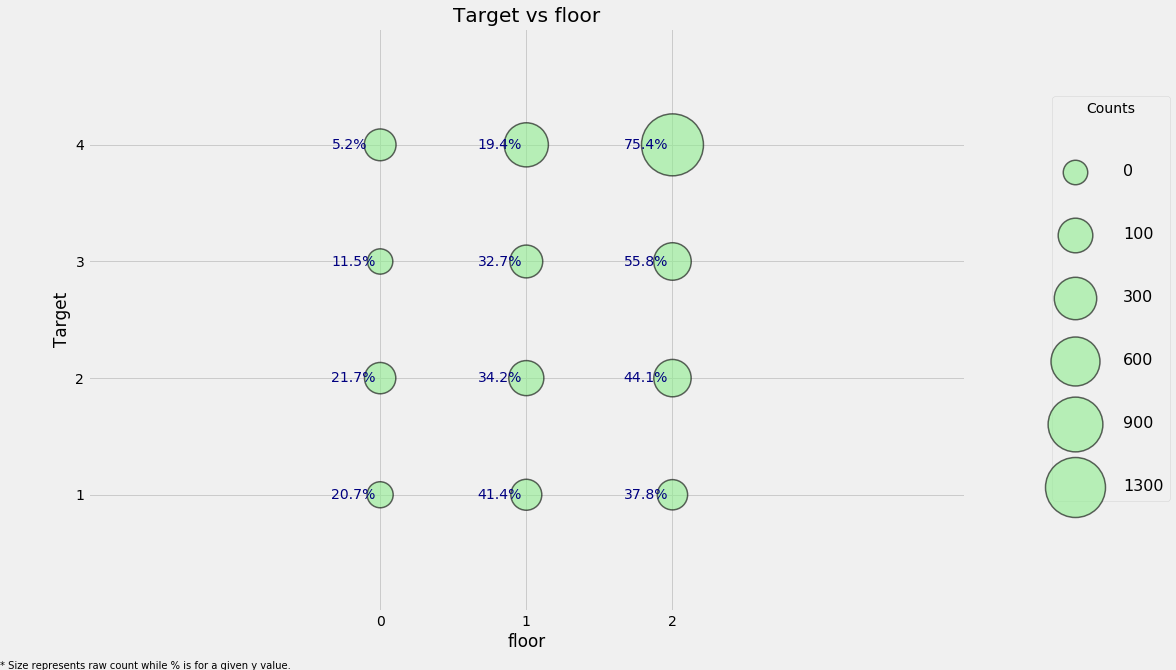

In [263]:
plot_categoricals('floor', 'Target', heads)

#### 7.5.3. Feature Construction
기존의 피처를 가지고 새로운 피처를 만들 수도 있다. 예를 들면, 앞서 만들었던 `wall`, `roof`, `floor`를 합쳐서 하나의 피처로 생성할 수 있다.

##### 7.5.3.1. wall+roof+floor feature

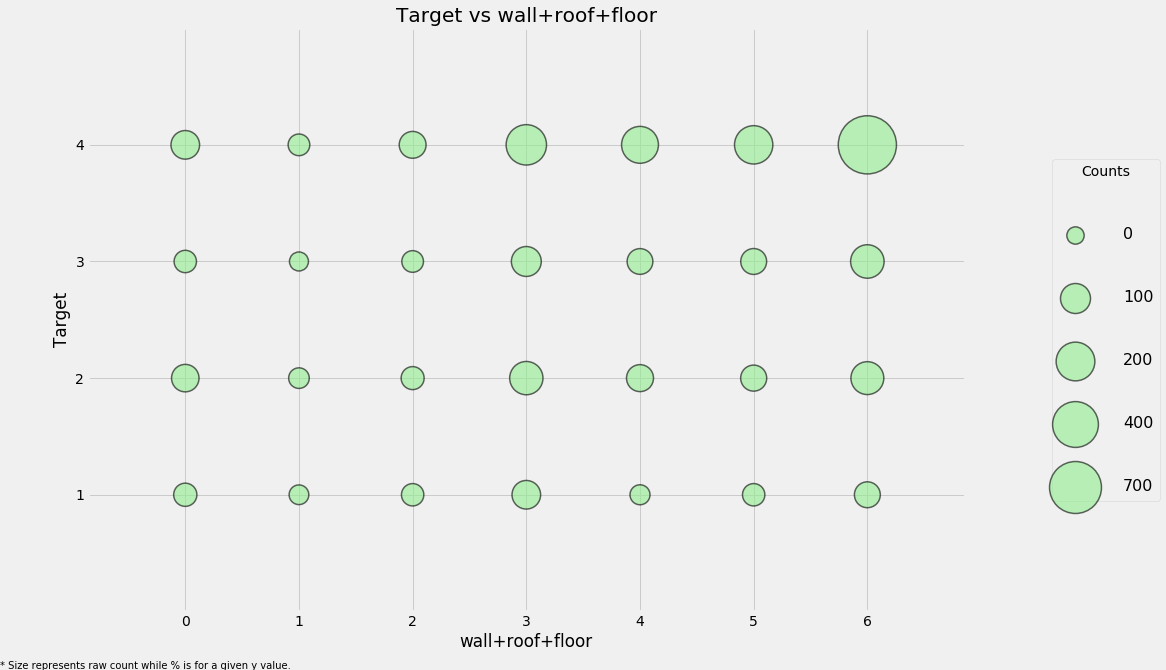

In [264]:
# wall, roof, floor의 개수를 모두 합친 wall+roof+floor 피처 생성
heads['wall+roof+floor'] = heads['wall'] + heads['roof'] + heads['floor']
plot_categoricals('wall+roof+floor', 'Target', heads, annotate=False)

분포를 보면 **타겟 값이 4인 가구가 대체로 집의 품질이 좋음**을 판단할 수 있다. 이를 시각화해서 세부적으로 살펴보자.

In [265]:
# wall+roof+floor와 Target값별 데이터의 수 분포
count = pd.DataFrame(heads.groupby('wall+roof+floor')['Target'].value_counts(
    normalize=True)).rename(columns={'Target': 'Nomarlized Count'}).reset_index()
count.head(10)

,wall+roof+floor,Target,Nomarlized Count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529
5,1,2.0,0.264706
6,1,1.0,0.220588
7,1,3.0,0.191176
8,2,4.0,0.409449
9,2,2.0,0.220472


##### 7.5.3.2. warning feature
이제 집의 위험도를 나타내는 `warning` 변수를 생성해주자. 이 변수는 화장실, 전기, 바닥, 수도, 천장이 없는 경우 -1점씩 감점되어 나타낼 것이다.

In [267]:
# 집의 위험도를 나타내는 warning 피처 생성
# 화장실, 전기, 바닥, 수도, 천장 여부로 판단
heads['warning'] =  1 * (heads['sanitario1'] + (heads['elec'] == 0) +
                        heads['pisonotiene'] + heads['abastaguano'] + (heads['cielorazo'] == 0))
heads['warning'].value_counts()

0    7045
1    3061
2     159
3      32
4      10
Name: warning, dtype: int64

Text(0.5, 1.0, 'target vs warning variable')

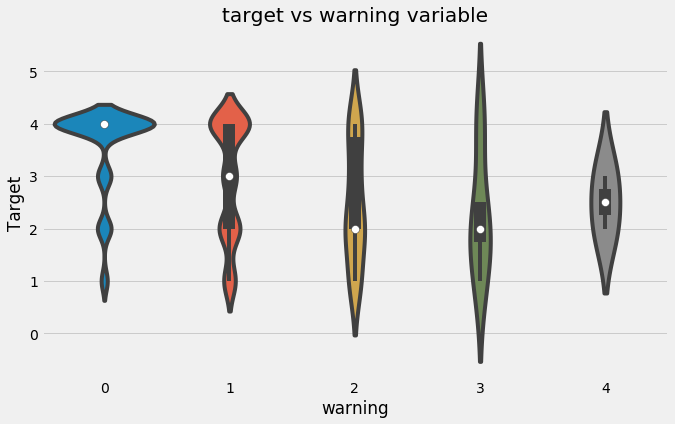

In [268]:
# 각 warning의 값별 Target값 분포 - violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='warning', y='Target', data=heads)
plt.title('target vs warning variable')

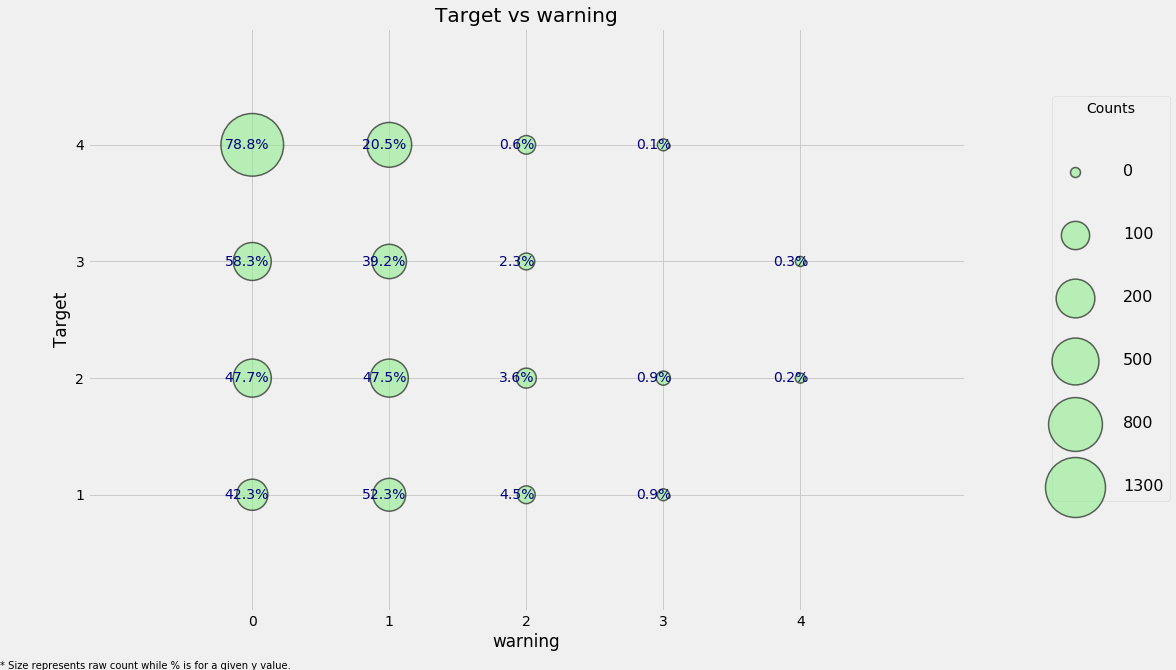

In [269]:
plot_categoricals('warning', 'Target', data=heads)

violinplot과 바로 위의 scatterplot을 비교해봤을 때 violinplot은 그닥 좋아보이지 않는다. 왜냐하면 `warning`의 각 값별 개수는 많이 다른데 단순히 개수가 아닌 분포로만 보기 때문이다.

어쨌든 **가구들의 위험요소가 적으면 빈곤 정도가 낮다**는 것을 알 수 있다.

##### 7.5.3.3. per capita features
다음은 냉장고, 컴퓨터, 태블릿, TV 같은 가전을 얼마나 갖고 있는지를 나타내는 `bonus` 피처이다. 확실히 **가구
다음은 **1인당 소유하고 있는 냉장고, 컴퓨터, 태블릿, TV의 개수**를 나타내는 변수들이다. 소유하고 있는 각 가전의 개수에 가구원수를 나누어 계산한다.

### 7.6. Individual Level Variables

### 7.7. Feature Engineering
#### 7.7.1. Feature Selection
#### 7.7.2. Final Data Exploration

## 8. Machine Learning Modeling

## 9. Model Selection

## 10. Feature Selection

## 11. Upgrade Our Model: Gradient Boosting Model

## 12. Light Gradient Boostin

## 13. Model Optimization

## 14. Model Tuning with Hyperopt

## 15. Investigate Predictions

## 16. Dimension Reduction

## 17. Visualize Single Decision Tree

## 18. Conclusion